In [106]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


## Install File


In [292]:
nameCSV = 'innis_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2662

In [362]:
data.head

<bound method DataFrame.head of             lat        lon        wh            tt        qc       back  \
1575 -17.539467  147.61310  2.177000     89.342903  1.000000  11.582940   
1576 -17.669315  147.22588  0.291000     94.893235  1.000000  11.892500   
1577 -17.014643  147.98634  2.164000     97.899377  1.000000  10.480000   
1578 -17.131037  147.43596  1.579800    112.412143  1.000000  10.087999   
1579 -17.236593  147.05145  2.310600    135.481415  1.000000   9.507999   
1580 -17.790522  147.90770  0.482667    210.701109  1.000000  11.661667   
1581 -17.345236  147.77684  1.271778    233.770204  1.000000  12.514444   
1582 -17.626534  147.35735  0.473182    256.839404  1.000000  11.112726   
1583 -17.257680  147.87910  0.410900    265.395772  1.000000  11.475000   
1584 -17.051935  147.33057  2.001000    279.908360  1.000000  10.019999   
1585 -17.105358  147.05392  1.241000    302.977366  1.000000  10.310000   
1586 -17.696650  147.85810  1.731545    305.983441  1.000000  10.006

In [142]:
t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

In [165]:
alltime

array([datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
       datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
       datetime.datetime(1985, 4, 8, 21, 35, 6, 187500), ...,
       datetime.datetime(2019, 2, 9, 1, 11, 43, 638834),
       datetime.datetime(2019, 2, 10, 13, 55, 59, 960156),
       datetime.datetime(2019, 2, 18, 23, 10, 14, 196875)], dtype=object)

## Calculate mean value of each satellite track 

In [163]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


In [164]:
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [166]:
days5 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days5.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days5.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


In [167]:
days5

[datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
 datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
 datetime.datetime(1985, 4, 8, 21, 35, 6, 187500),
 datetime.datetime(1985, 4, 23, 9, 53, 29, 146876),
 datetime.datetime(1985, 5, 16, 11, 33, 14, 298438),
 datetime.datetime(1985, 7, 30, 16, 49, 35, 815105),
 datetime.datetime(1985, 8, 22, 18, 29, 5, 607639),
 datetime.datetime(1985, 9, 14, 20, 8, 44, 546877),
 datetime.datetime(1985, 9, 23, 9, 29, 54, 689844),
 datetime.datetime(1985, 10, 7, 21, 48, 2, 343750),
 datetime.datetime(1985, 10, 30, 23, 27, 24, 464844),
 datetime.datetime(1985, 11, 2, 23, 36, 9, 269886),
 datetime.datetime(1985, 11, 8, 12, 48, 30, 101562),
 datetime.datetime(1985, 11, 26, 1, 15, 21, 96897),
 datetime.datetime(1986, 1, 11, 4, 33, 36, 420703),
 datetime.datetime(1986, 1, 19, 17, 54, 59, 206250),
 datetime.datetime(1986, 2, 3, 6, 12, 35, 508371),
 datetime.datetime(1986, 3, 1, 8, 0, 17, 441840),
 datetime.datetime(1986, 3, 24, 9, 39, 13, 101562),
 datetime.

In [156]:
t1

datetime.datetime(1994, 12, 12, 3, 2, 12, 194602)

In [157]:
alltime

array([datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
       datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
       datetime.datetime(1985, 4, 8, 21, 35, 6, 187500), ...,
       datetime.datetime(2019, 2, 9, 1, 11, 43, 638834),
       datetime.datetime(2019, 2, 10, 13, 55, 59, 960156),
       datetime.datetime(2019, 2, 18, 23, 10, 14, 196875)], dtype=object)

In [153]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [154]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

1.28083336353302 1997-06-01 10:47:57.174753
2.278947353363037 1997-06-02 23:32:16.178820
2.1278333663940434 1997-06-06 00:30:51.673441
0.6000001430511475 1997-06-21 06:45:00.559245
2.007294178009033 1997-06-22 05:25:52.679915
2.1380624771118164 1997-06-22 19:29:18.009868
2.617105484008789 1997-07-01 04:43:30.593339
1.772764801979065 1997-07-02 17:27:48.575657
2.918555736541748 1997-07-08 12:49:50.826286
0.4871110916137695 1997-07-11 00:30:52.801925
1.4814118146896362 1997-07-11 02:42:01.697852
1.5626842975616455 1997-07-12 15:26:19.517269
1.385470628738403 1997-07-21 00:40:33.368218
1.4407895803451538 1997-07-22 13:24:48.865885
0.8245263695716858 1997-07-27 12:52:41.210938
0.791263222694397 1997-07-30 22:39:04.794408
1.0367499589920044 1997-08-01 11:23:22.714844
0.8126922845840454 1997-08-12 12:49:50.550782
0.6803684234619141 1997-08-15 00:30:52.030733
2.2666471004486084 1997-08-19 18:36:06.832032
1.8215001821517944 1997-08-21 07:20:25.183799
1.601578950881958 1997-08-29 16:34:37.53033

1.031100082397461 2009-05-09 23:57:51.866666
0.49499999152289503 2009-05-10 12:22:33.291903
0.9644001722335817 2009-05-12 07:59:22.182155
0.6013000011444092 2009-05-13 20:43:39.907031
0.5861499786376954 2009-05-22 05:57:53.697852
1.1202500343322754 2009-05-23 18:42:12.448437
2.0090002059936523 2009-05-26 12:19:43.370833
2.02400016784668 2009-05-29 00:00:45.323200
2.766400098800659 2009-06-01 03:56:25.690821
1.6250001192092896 2009-06-02 16:40:44.333594
3.261000061035156 2009-06-11 01:54:58.012110
2.121900177001953 2009-06-12 14:39:15.953125
1.6293500900268554 2009-06-13 23:57:53.706250
2.9048001766204834 2009-06-14 12:22:35.132813
2.7634286426362538 2009-06-20 23:53:29.445313
1.8511999130249024 2009-06-22 12:37:47.741796
1.3297500610351562 2009-06-30 12:19:45.940340
1.9446876049041748 2009-06-30 21:52:01.065625
1.37842857837677 2009-07-02 10:36:19.595704
2.392300033569336 2009-07-03 00:00:45.634453
2.775533437728882 2009-07-10 19:50:32.614843
2.8873003005981444 2009-07-12 08:34:50.4980

In [4]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

1.993000149726868 2002-04-01 10:25:20.359372
1.8640553951263428 2002-04-02 23:09:30.902777
2.657925844192505 2002-04-07 05:02:03.794406
2.223315954208374 2002-04-11 08:23:45.131991
2.347000360488892 2002-04-12 06:29:30.518228
0.996736705303192 2002-04-21 06:22:15.178043
0.8569091558456421 2002-04-22 19:06:30.170455
0.6232500076293945 2002-04-23 12:48:07.301269
2.134833574295044 2002-04-29 07:42:21.265625
3.463949918746948 2002-05-01 04:20:45.326172
3.2778949737548833 2002-05-02 17:05:03.367599
2.123421430587769 2002-05-11 02:19:16.685753
2.033499956130981 2002-05-12 06:12:03.997357
1.0801053047180176 2002-05-21 00:17:48.615896
0.7274582982063293 2002-05-24 06:57:33.739583
0.722235381603241 2002-05-28 12:48:13.607537
1.131999969482422 2002-05-30 22:16:26.279514
1.5298666954040527 2002-05-31 00:29:15.198438
1.3574737310409546 2002-06-01 11:00:38.999177
1.2933334112167358 2002-06-02 10:07:59.330730
2.2178423404693604 2002-06-09 20:14:52.316612
1.4573158025741575 2002-06-11 08:59:11.199835

2.222105327405428 2010-03-27 03:56:31.917763
1.5010455738414417 2010-04-04 16:31:06.819203
2.3594445122612853 2010-04-06 01:55:02.931641
0.9986000657081604 2010-04-09 00:00:37.589380
1.7198001861572263 2010-04-14 11:09:14.937109
1.611600112915039 2010-04-15 23:53:32.900782
1.3758000373840331 2010-04-24 09:07:46.655469
0.8642728328704834 2010-04-25 12:22:24.654829
1.810149955749512 2010-05-04 07:06:18.450391
1.3678572518484933 2010-05-05 19:50:36.955358
1.4659286737442017 2010-05-11 12:19:35.096540
1.8861335515975952 2010-05-14 00:00:36.424800
1.0627499580383302 2010-05-15 17:49:08.802343
1.031100082397461 2010-05-24 03:03:21.773828
0.49499999152289503 2010-05-25 15:47:40.114584
0.9644001722335817 2010-05-29 23:57:43.502084
0.6013000011444092 2010-05-30 12:22:25.262499
0.5861499786376954 2010-06-03 01:01:53.494628
1.1202500343322754 2010-06-04 13:46:12.052344
2.0090002059936523 2010-06-12 23:00:24.952343
2.02400016784668 2010-06-14 11:44:43.030468
2.766400098800659 2010-06-15 12:19:34.3

0.7574706077575684 2018-04-25 12:20:23
0.7070526323820415 2018-04-27 11:22:36.248356
1.7116925166203425 2018-04-30 23:05:03.662147
1.3077143260410853 2018-05-07 09:53:00.121652
1.2800476437523252 2018-05-09 08:12:12.647694
1.5718824723187614 2018-05-12 17:39:24.355698
1.635764718055725 2018-05-14 00:00:16
2.2952633907920434 2018-05-17 07:51:29.417351
2.2666668362087674 2018-05-18 05:17:27.275608
2.0938236713409424 2018-05-22 12:20:23
1.6017501831054688 2018-05-24 18:47:52.718750
2.093000221252441 2018-05-27 05:50:00.499804
2.175952366420201 2018-05-28 18:34:18.886161
1.8360000610351563 2018-05-31 04:23:06.241796
1.5624500274658204 2018-06-06 03:48:32.384178
2.1104499816894533 2018-06-07 16:32:51.037499
1.2993529824649586 2018-06-08 16:16:53.764706
1.4257649183273315 2018-06-10 00:00:16.999999
1.1001001358032227 2018-06-16 01:47:04.170116
1.1380555894639757 2018-06-17 08:29:06.188368
1.9442942142486568 2018-06-18 12:20:24
1.8329091505570845 2018-06-26 03:05:58.534445
2.078526547080592 2

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [5]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [6]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[7.21842117 3.84835449 6.06049484 ... 5.92469211 6.59358157 5.14627429]
2662 2662


## Make list for each month

In [8]:
#wave height
janwh = []
febwh = []
marwh = []
aprwh = []
maywh = []
junwh = []
julwh = []
augwh = []
sepwh = []
octwh = []
novwh = []
decwh = []


#time
jantime = []
febtime = []
martime = []
aprtime = []
maytime = []
juntime = []
jultime = []
augtime = []
septime = []
octtime = []
novtime = []
dectime = []


#wind speed
janws = []
febws = []
marws = []
aprws = []
mayws = []
junws = []
julws = []
augws = []
sepws = []
octws = []
novws = []
decws = []


#backscatter
janbs = []
febbs = []
marbs = []
aprbs = []
maybs = []
junbs = []
julbs = []
augbs = []
sepbs = []
octbs = []
novbs = []
decbs = []

#period
janTp = []
febTp = []
marTp = []
aprTp = []
mayTp = []
junTp = []
julTp = []
augTp = []
sepTp = []
octTp = []
novTp = []
decTp = []


In [208]:
days5

[datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
 datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
 datetime.datetime(1985, 4, 8, 21, 35, 6, 187500),
 datetime.datetime(1985, 4, 23, 9, 53, 29, 146876),
 datetime.datetime(1985, 5, 16, 11, 33, 14, 298438),
 datetime.datetime(1985, 7, 30, 16, 49, 35, 815105),
 datetime.datetime(1985, 8, 22, 18, 29, 5, 607639),
 datetime.datetime(1985, 9, 14, 20, 8, 44, 546877),
 datetime.datetime(1985, 9, 23, 9, 29, 54, 689844),
 datetime.datetime(1985, 10, 7, 21, 48, 2, 343750),
 datetime.datetime(1985, 10, 30, 23, 27, 24, 464844),
 datetime.datetime(1985, 11, 2, 23, 36, 9, 269886),
 datetime.datetime(1985, 11, 8, 12, 48, 30, 101562),
 datetime.datetime(1985, 11, 26, 1, 15, 21, 96897),
 datetime.datetime(1986, 1, 11, 4, 33, 36, 420703),
 datetime.datetime(1986, 1, 19, 17, 54, 59, 206250),
 datetime.datetime(1986, 2, 3, 6, 12, 35, 508371),
 datetime.datetime(1986, 3, 1, 8, 0, 17, 441840),
 datetime.datetime(1986, 3, 24, 9, 39, 13, 101562),
 datetime.

In [372]:
print len(days5)
days5wh = wh[days]
print len(days5wh)

2394
2394


In [373]:
df = pd.DataFrame(data={"date": days5, "wh":days5wh })
df.to_csv("./file.csv", sep=',',index=False)

In [293]:
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [209]:
days5[0].month

3

In [289]:
for k in range(len(days5)-1):
    dt = days5[k]
    
    if dt.month == 1:
        janwh.append(np.mean(wh[days5[k]:days5[k+1]]))
        jantime.append(days5[k])

TypeError: slice indices must be integers or None or have an __index__ method

In [288]:
jantime

[375.19000486924784,
 383.74651859086015,
 1101.3376378684104,
 1103.8809883174254,
 1120.9314606842818,
 2928.296008496258,
 2929.6467143373798,
 2938.031573667761,
 2939.562334412697,
 2947.9472132561186,
 2949.477982204861,
 3294.994704519515,
 3296.5254125881293,
 3304.9102843738597,
 3306.441046477144,
 3314.825916293555,
 3316.3566740813226,
 3653.488528127089,
 3661.873409053095,
 3663.4041762228894,
 3671.789048685453,
 3673.319820571704,
 3681.7046957427183,
 4018.836495596426,
 4020.3672770714147,
 4028.752179970277,
 4030.019456463311,
 4040.198549914149,
 4046.5346661815834,
 4385.715288561849,
 4387.246050904038,
 4395.63093383789,
 4396.534582112631,
 4397.161695520951,
 4399.021401266622,
 4407.0773428497305,
 4749.02143664126,
 4752.594056160383,
 4754.1248282306515,
 4762.509710743331,
 4764.04048077737,
 4765.198396326164,
 5115.2528782547115,
 5119.472853566876,
 5121.003523840221,
 5129.388496219342,
 5130.9192544621055,
 5131.53454441651,
 5134.021370390184,
 5140.

In [335]:
for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        janwh.append(np.mean(wh[days[k]:days[k+1]]))
        jantime.append(days[k])
#         janws.append(np.mean(ws[days5[k]:days5[k+1]]))
#         janbs.append(np.mean(back[days5[k]:days5[k+1]]))
#         janTp.append(np.mean(T[days5[k]:days5[k+1]]))
        
#     if dt.month == 2:
#         febwh.append(np.mean(wh[days[k]:days[k+1]]))
#         febtime.append(tt[days[k]])
#         febws.append(np.mean(ws[days[k]:days[k+1]]))    
#         febbs.append(np.mean(back[days[k]:days[k+1]]))
#         febTp.append(np.mean(T[days[k]:days[k+1]]))
        
#     if dt.month == 3:
#         marwh.append(np.mean(wh[days[k]:days[k+1]]))
#         martime.append(tt[days[k]])
#         marws.append(np.mean(ws[days[k]:days[k+1]]))
#         marbs.append(np.mean(back[days[k]:days[k+1]]))
#         marTp.append(np.mean(T[days[k]:days[k+1]]))    
            
#     if dt.month == 4:
#         aprwh.append(np.mean(wh[days[k]:days[k+1]]))
#         aprtime.append(tt[days[k]])
#         aprws.append(np.mean(ws[days[k]:days[k+1]]))
#         aprbs.append(np.mean(back[days[k]:days[k+1]]))
#         aprTp.append(np.mean(T[days[k]:days[k+1]]))   
        
#     if dt.month == 5:
#         maywh.append(np.mean(wh[days[k]:days[k+1]]))
#         maytime.append(tt[days[k]])
#         mayws.append(np.mean(ws[days[k]:days[k+1]]))
#         maybs.append(np.mean(back[days[k]:days[k+1]]))
#         mayTp.append(np.mean(T[days[k]:days[k+1]]))   

#     if dt.month == 6:
#         junwh.append(np.mean(wh[days[k]:days[k+1]]))
#         juntime.append(tt[days[k]])
#         junws.append(np.mean(ws[days[k]:days[k+1]]))
#         junbs.append(np.mean(back[days[k]:days[k+1]]))
#         junTp.append(np.mean(T[days[k]:days[k+1]]))   
        
#     if dt.month == 7:
#         julwh.append(np.mean(wh[days[k]:days[k+1]]))
#         jultime.append(tt[days[k]])
#         julws.append(np.mean(ws[days[k]:days[k+1]]))
#         julbs.append(np.mean(back[days[k]:days[k+1]]))
#         julTp.append(np.mean(T[days[k]:days[k+1]]))   
        
#     if dt.month == 8:
#         augwh.append(np.mean(wh[days[k]:days[k+1]]))
#         augtime.append(tt[days[k]])
#         augws.append(np.mean(ws[days[k]:days[k+1]]))
#         augbs.append(np.mean(back[days[k]:days[k+1]]))
#         augTp.append(np.mean(T[days[k]:days[k+1]]))   

#     if dt.month == 9:
#         sepwh.append(np.mean(wh[days[k]:days[k+1]]))
#         septime.append(tt[days[k]])
#         sepws.append(np.mean(ws[days[k]:days[k+1]]))
#         sepbs.append(np.mean(back[days[k]:days[k+1]]))
#         sepTp.append(np.mean(T[days[k]:days[k+1]]))   
        
#     if dt.month == 10:
#         octwh.append(np.mean(wh[days[k]:days[k+1]]))
#         octtime.append(tt[days[k]])
#         octws.append(np.mean(ws[days[k]:days[k+1]]))
#         octbs.append(np.mean(back[days[k]:days[k+1]]))
#         octTp.append(np.mean(T[days[k]:days[k+1]]))   
        
#     if dt.month == 11:
#         novwh.append(np.mean(wh[days[k]:days[k+1]]))
#         novtime.append(tt[days[k]])
#         novws.append(np.mean(ws[days[k]:days[k+1]]))
#         novbs.append(np.mean(back[days[k]:days[k+1]]))
#         novTp.append(np.mean(T[days[k]:days[k+1]]))   
        
#     if dt.month == 12:
#         decwh.append(np.mean(wh[days[k]:days[k+1]]))
#         dectime.append(tt[days[k]])
#         decws.append(np.mean(ws[days[k]:days[k+1]]))
#         decbs.append(np.mean(back[days[k]:days[k+1]]))
#         decTp.append(np.mean(T[days[k]:days[k+1]]))   

In [231]:
janwh

[0.7686000466346741,
 0.6541999578475952,
 1.8524285554885864,
 1.9820001125335691,
 1.6690001487731934,
 0.8360589146614075,
 1.6799334287643433,
 1.6904211044311523,
 1.235579013824463,
 1.052210569381714,
 0.986099898815155,
 0.6158888936042786,
 0.7856842279434204,
 1.7403684854507446,
 1.3499001264572144,
 1.6460527181625366,
 1.8405556678771973,
 0.7690526843070984,
 1.776699781417847,
 1.9347897768020632,
 1.2725000381469729,
 0.6924445033073425,
 0.9080000519752502,
 0.8856501579284668,
 0.6810587644577026,
 0.7994546294212341,
 2.1283175945281982,
 1.0412105321884155,
 0.7984706163406372,
 2.0901050567626958,
 2.4398424625396733,
 1.571050047874451,
 1.6551111936569214,
 1.9902633428573608,
 1.8942352533340452,
 0.8330000042915344,
 3.551200151443481,
 1.8054444789886477,
 1.4682632684707642,
 2.29547381401062,
 3.821631908416748,
 4.095423221588135,
 0.8156452178955078,
 2.080833196640014,
 0.9699999690055848,
 1.2901667356491089,
 2.2067368030548096,
 2.0143887996673584,
 2.

In [337]:
len(jantime)

1992

In [233]:
type(jantime)

list

In [234]:
jandate = np.array(jantime)
type(jandate)

numpy.ndarray

In [235]:
for k in range(len(jantime)):
    print 'date:', netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC')

date: 1986-01-11 04:33:36.420703
date: 1986-01-19 17:54:59.206250
date: 1988-01-07 08:06:11.911831
date: 1988-01-09 21:08:37.390626
date: 1988-01-26 22:21:18.203122
date: 1993-01-07 07:06:15.134077
date: 1993-01-08 15:31:16.118750
date: 1993-01-17 00:45:27.964895
date: 1993-01-18 13:29:45.693257
date: 1993-01-26 22:43:59.225329
date: 1993-01-28 11:28:17.662500
date: 1994-01-08 23:52:22.470486
date: 1994-01-10 12:36:35.647614
date: 1994-01-18 21:50:48.569901
date: 1994-01-20 10:35:06.415625
date: 1994-01-28 19:49:19.167763
date: 1994-01-30 08:33:36.640626
date: 1995-01-02 11:43:28.830180
date: 1995-01-10 20:57:42.542187
date: 1995-01-12 09:42:00.825658
date: 1995-01-20 18:56:13.806423
date: 1995-01-22 07:40:32.497395
date: 1995-01-30 16:54:45.712171
date: 1996-01-02 20:04:33.219531
date: 1996-01-04 08:48:52.738970
date: 1996-01-12 18:03:08.349432
date: 1996-01-14 00:28:01.038430
date: 1996-01-24 04:45:54.712582
date: 1996-01-30 12:49:55.158089
date: 1997-01-03 17:10:00.931744
date: 1997

TypeError: can't compare datetime.datetime to int

In [236]:
for k in range(len(jandate)):
    print 'date:', netCDF4.num2date(jandate[k],u'days since 1985-01-01 00:00:00 UTC')

 date: 1986-01-11 04:33:36.420703
date: 1986-01-19 17:54:59.206250
date: 1988-01-07 08:06:11.911831
date: 1988-01-09 21:08:37.390626
date: 1988-01-26 22:21:18.203122
date: 1993-01-07 07:06:15.134077
date: 1993-01-08 15:31:16.118750
date: 1993-01-17 00:45:27.964895
date: 1993-01-18 13:29:45.693257
date: 1993-01-26 22:43:59.225329
date: 1993-01-28 11:28:17.662500
date: 1994-01-08 23:52:22.470486
date: 1994-01-10 12:36:35.647614
date: 1994-01-18 21:50:48.569901
date: 1994-01-20 10:35:06.415625
date: 1994-01-28 19:49:19.167763
date: 1994-01-30 08:33:36.640626
date: 1995-01-02 11:43:28.830180
date: 1995-01-10 20:57:42.542187
date: 1995-01-12 09:42:00.825658
date: 1995-01-20 18:56:13.806423
date: 1995-01-22 07:40:32.497395
date: 1995-01-30 16:54:45.712171
date: 1996-01-02 20:04:33.219531
date: 1996-01-04 08:48:52.738970
date: 1996-01-12 18:03:08.349432
date: 1996-01-14 00:28:01.038430
date: 1996-01-24 04:45:54.712582
date: 1996-01-30 12:49:55.158089
date: 1997-01-03 17:10:00.931744
date: 199

TypeError: can't compare datetime.datetime to int

In [13]:
# USE THIS! jan = wh, janT=time in jan

for k in range(len(janwh)):
    print 'date:', netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC'),'wave height:',janwh[k], 'period:', janTp[k]

date: 1986-01-11 04:33:36.420703 wave height: 0.7686000466346741 period: 6.38851939740019
date: 1986-01-19 17:54:59.206250 wave height: 0.6541999578475952 period: 4.579485667535076
date: 1988-01-07 08:06:11.911831 wave height: 1.8524285554885864 period: 5.008655814237941
date: 1988-01-09 21:08:37.390626 wave height: 1.9820001125335691 period: 5.511557083114969
date: 1988-01-26 22:21:18.203122 wave height: 1.6690001487731934 period: 5.4976606394607455
date: 1993-01-07 07:06:15.134077 wave height: 0.8360589146614075 period: 4.774740775874781
date: 1993-01-08 15:31:16.118750 wave height: 1.6799334287643433 period: 5.403592849353592
date: 1993-01-17 00:45:27.964895 wave height: 1.6904211044311523 period: 5.40949216120966
date: 1993-01-18 13:29:45.693257 wave height: 1.235579013824463 period: 4.968159479542644
date: 1993-01-26 22:43:59.225329 wave height: 1.052210569381714 period: 4.738438981152333
date: 1993-01-28 11:28:17.662500 wave height: 0.986099898815155 period: 4.637474785312307
dat

In [23]:
print len(janwh),len(janws),len(jantime),len(janbs),len(janTp)

199 199 199 199 199


In [26]:
print np.mean(janwh)
print np.mean(junwh)

1.313808979496272
1.70892771006522


In [28]:
#wave height 
overallwh = [
np.mean(janwh),
np.mean(febwh),
np.mean(marwh),
np.mean(aprwh),
np.mean(maywh),
np.mean(junwh),
np.mean(julwh),
np.mean(augwh),
np.mean(sepwh),
np.mean(octwh),
np.mean(novwh),
np.mean(decwh)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(janwh),
np.std(febwh),
np.std(marwh),
np.std(aprwh),
np.std(maywh),
np.std(junwh),
np.std(julwh),
np.std(augwh),
np.std(sepwh),
np.std(octwh),
np.std(novwh),
np.std(decwh)]

In [74]:
#period
overallTp = [
np.mean(janTp),
np.mean(febTp),
np.mean(marTp),
np.mean(aprTp),
np.mean(mayTp),
np.mean(junTp),
np.mean(julTp),
np.mean(augTp),
np.mean(sepTp),
np.mean(octTp),
np.mean(novTp),
np.mean(decTp)]

stdev = [
np.std(janTp),
np.std(febTp),
np.std(marTp),
np.std(aprTp),
np.std(mayTp),
np.std(junTp),
np.std(julTp),
np.std(augTp),
np.std(sepTp),
np.std(octTp),
np.std(novTp),
np.std(decTp)]

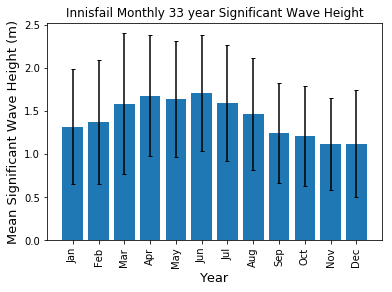

In [30]:
index = np.arange(len(label))
plt.bar(index, overallwh, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail Monthly 33 year Significant Wave Height')
plt.savefig('Innisfail mean Monthly 33 year Significant Wave Height')
plt.show()

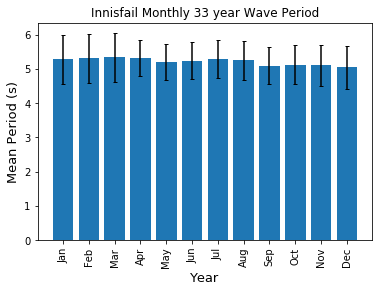

In [75]:
index = np.arange(len(label))
plt.bar(index, overallTp, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Period (s)', fontsize=13, rotation=90)
plt.title('Innisfail Monthly 33 year Wave Period')
plt.savefig('Innisfail mean Monthly 33 year Wave Period')
plt.show()

In [92]:
tt

array([   89.34290316,    94.893235  ,    97.89937717, ...,
       12457.04981063, 12458.58055509, 12466.96544209])

In [86]:
jandate = []
for k in range(len(janwh)):
    jandate.append(netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC'))

TypeError: can't compare datetime.datetime to int

In [318]:
days5

[375.19000486924784,
 383.74651859086015,
 1101.3376378684104,
 1103.8809883174254,
 1120.9314606842818,
 2928.296008496258,
 2929.6467143373798,
 2938.031573667761,
 2939.562334412697,
 2947.9472132561186,
 2949.477982204861,
 3294.994704519515,
 3296.5254125881293,
 3304.9102843738597,
 3306.441046477144,
 3314.825916293555,
 3316.3566740813226,
 3653.488528127089,
 3661.873409053095,
 3663.4041762228894,
 3671.789048685453,
 3673.319820571704,
 3681.7046957427183,
 4018.836495596426,
 4020.3672770714147,
 4028.752179970277,
 4030.019456463311,
 4040.198549914149,
 4046.5346661815834,
 4385.715288561849,
 4387.246050904038,
 4395.63093383789,
 4396.534582112631,
 4397.161695520951,
 4399.021401266622,
 4407.0773428497305,
 4749.02143664126,
 4752.594056160383,
 4754.1248282306515,
 4762.509710743331,
 4764.04048077737,
 4765.198396326164,
 5115.2528782547115,
 5119.472853566876,
 5121.003523840221,
 5129.388496219342,
 5130.9192544621055,
 5131.53454441651,
 5134.021370390184,
 5140.

In [323]:
for k in range(len(jantime)):
    print 'date:', netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC')

date: 1986-01-11 04:33:36.420703
date: 1986-01-19 17:54:59.206250
date: 1988-01-07 08:06:11.911831
date: 1988-01-09 21:08:37.390626
date: 1988-01-26 22:21:18.203122
date: 1993-01-07 07:06:15.134077
date: 1993-01-08 15:31:16.118750
date: 1993-01-17 00:45:27.964895
date: 1993-01-18 13:29:45.693257
date: 1993-01-26 22:43:59.225329
date: 1993-01-28 11:28:17.662500
date: 1994-01-08 23:52:22.470486
date: 1994-01-10 12:36:35.647614
date: 1994-01-18 21:50:48.569901
date: 1994-01-20 10:35:06.415625
date: 1994-01-28 19:49:19.167763
date: 1994-01-30 08:33:36.640626
date: 1995-01-02 11:43:28.830180
date: 1995-01-10 20:57:42.542187
date: 1995-01-12 09:42:00.825658
date: 1995-01-20 18:56:13.806423
date: 1995-01-22 07:40:32.497395
date: 1995-01-30 16:54:45.712171
date: 1996-01-02 20:04:33.219531
date: 1996-01-04 08:48:52.738970
date: 1996-01-12 18:03:08.349432
date: 1996-01-14 00:28:01.038430
date: 1996-01-24 04:45:54.712582
date: 1996-01-30 12:49:55.158089
date: 1997-01-03 17:10:00.931744
date: 1997

TypeError: can't compare datetime.datetime to int

In [325]:
janTi = []
for k in range(len(janwh)):
    janTi.append(netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC'))
#     janTi.append(netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC'))

TypeError: can't compare datetime.datetime to int

In [377]:
#for k in range (len(jantime)):
#    print netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC')

In [407]:
df = pd.DataFrame(np.asarray(wh), columns=['wh'])
df['DATETIME'] = netCDF4.num2date(tt,u'days since 1985-01-01 00:00:00 UTC')
df

,wh,DATETIME
0,2.177000,1985-03-31 08:13:46.832721
1,0.291000,1985-04-05 21:26:15.503909
2,2.164000,1985-04-08 21:35:06.187500
3,1.579800,1985-04-23 09:53:29.146876
4,2.310600,1985-05-16 11:33:14.298438
5,0.482667,1985-07-30 16:49:35.815105
6,1.271778,1985-08-22 18:29:05.607639
7,0.473182,1985-09-14 20:08:44.546877
8,0.410900,1985-09-23 09:29:54.689844
9,2.001000,1985-10-07 21:48:02.343750


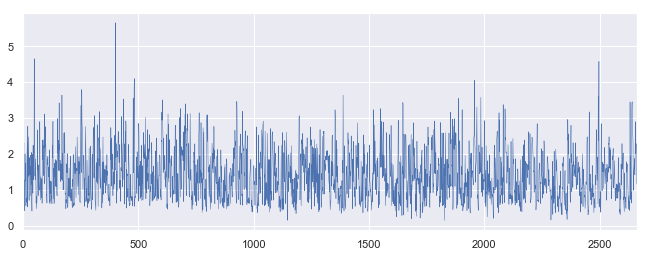

In [383]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


df['wh'].plot(linewidth=0.5)
datetick

In [392]:
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8, "ytick.major.size":8})
#sns.axes_style("whitegrid") 

sns.stripplot(x="Date",y="wh")

ValueError: Could not interpret input 'Date'

In [ ]:
# df = pd.DataFrame(np.asarray(wh), columns=['wh'])
# df['Date'] = netCDF4.num2date(tt,u'days since 1985-01-01 00:00:00 UTC')
# df

In [417]:
print len(df.wh)
print len(df.DATETIME)

2662
2662


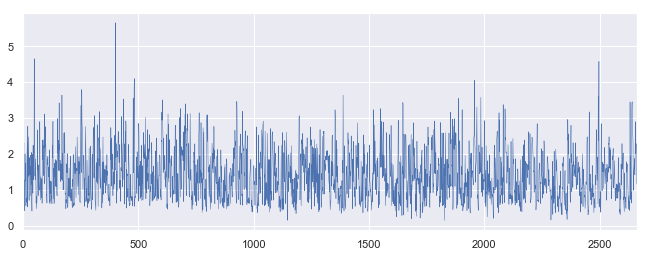

In [412]:
# # Import required python packages
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter
# import matplotlib.dates as mdates
# import seaborn as sns
# #import earthpy as et

# # Date time conversion registration
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# # Get the data
# data = df

# #os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# # Prettier plotting with seaborn
# sns.set(font_scale=1.5, style="whitegrid")
# plt.
# plt.scatter(dates,wh)
# plt.set(xlabel="Date", ylabel="Wave Height")
# plt.show()




sns.set(rc={'figure.figsize':(11, 4)})


df['wh'].plot(linewidth=0.5)
df['DATETIME'].plot

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


ValueError: arrays must all be same length

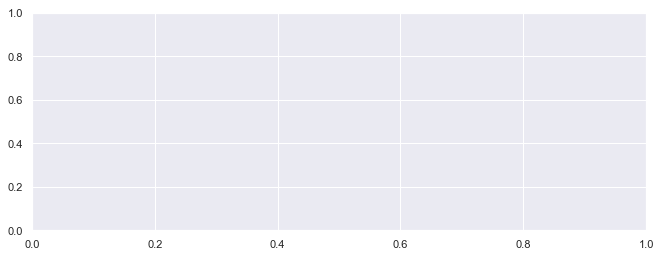

In [416]:
sns.tsplot(df.wh, time="df.DATETIME")
plt.show()

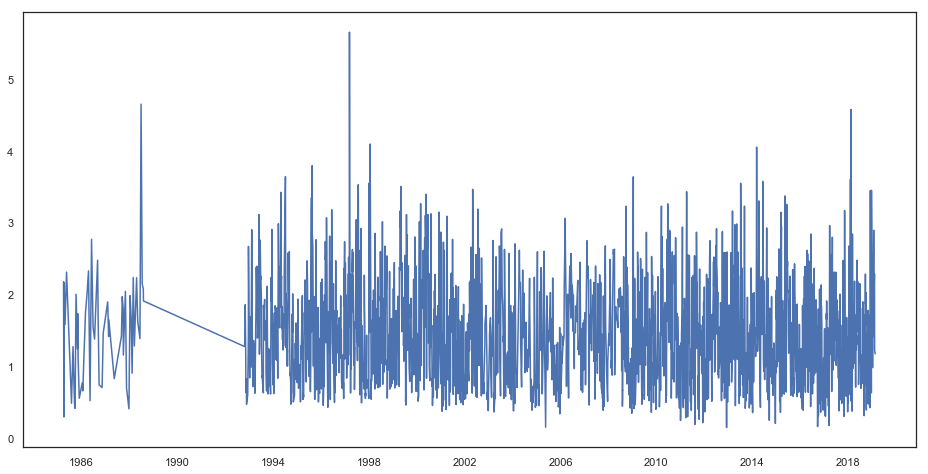

In [520]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(16,8))
plt.plot(x,y)


In [476]:
yrolling = data.rolling('30D', on = 'Date', min_periods = 1).mean()

In [477]:
yrolling

,wh,Date
0,2.177000,1985-03-31 08:13:46.832721
1,1.234000,1985-04-05 21:26:15.503909
2,1.544000,1985-04-08 21:35:06.187500
3,1.552950,1985-04-23 09:53:29.146876
4,1.945200,1985-05-16 11:33:14.298438
5,0.482667,1985-07-30 16:49:35.815105
6,0.877222,1985-08-22 18:29:05.607639
7,0.872480,1985-09-14 20:08:44.546877
8,0.442041,1985-09-23 09:29:54.689844
9,0.961694,1985-10-07 21:48:02.343750


In [494]:
yy = yrolling['wh']

In [493]:
yy

NameError: name 'Date' is not defined

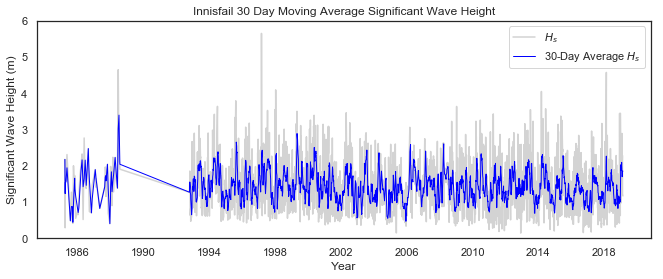

In [530]:
sns.set_style("white")

plt.plot(x,y,color='lightgrey',label="$H_s$")
plt.plot(x,yy,color='blue', linewidth=1, label="30-Day Average $H_s$")
plt.legend(loc='upper right')
plt.title("Innisfail 30 Day Moving Average Significant Wave Height")
plt.xlabel("Year")
plt.ylabel("Significant Wave Height (m)")


plt.ylim(0,6)
#plt.xlim(1985, 2020)
# ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

date_ticks = range(0, len(Date), 5)


ax.set_xticks(date_ticks);
ax.set_xticklabels([Date[i].strftime('%d %b') for i in date_ticks], rotation='vertical');
ax.set_xlabel('Date');

In [462]:
from pandas import Series, DataFrame
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

def rolling_mean(data, window, min_periods=1, center=False):
    ''' Function that computes a rolling mean

    Parameters
    ----------
    data : DataFrame or Series
           If a DataFrame is passed, the rolling_mean is computed for all columns.
    window : int or string
             If int is passed, window is the number of observations used for calculating 
             the statistic, as defined by the function pd.rolling_mean()
             If a string is passed, it must be a frequency string, e.g. '90S'. This is
             internally converted into a DateOffset object, representing the window size.
    min_periods : int
                  Minimum number of observations in window required to have a value.

    Returns
    -------
    Series or DataFrame, if more than one column    
    '''
    def f(x):
        '''Function to apply that actually computes the rolling mean'''
        if center == False:
            dslice = col[x-pd.datetools.to_offset(window).delta+timedelta(0,0,1):x]
                # adding a microsecond because when slicing with labels start and endpoint
                # are inclusive
        else:
            dslice = col[x-pd.datetools.to_offset(window).delta/2+timedelta(0,0,1):
                         x+pd.datetools.to_offset(window).delta/2]
        if dslice.size < min_periods:
            return np.nan
        else:
            return dslice.mean()

    data = df
    dfout = DataFrame()
    if isinstance(window, int):
        dfout = pd.rolling_mean(data, window, min_periods=min_periods, center=center)
    elif isinstance(window, basestring):
        idx = Series(data.index.to_pydatetime(), index=data.index)
        for colname, col in data.iterkv():
            result = idx.apply(f)
            result.name = colname
            dfout = dfout.join(result, how='outer')
    if dfout.columns.size == 1:
        dfout = dfout.ix[:,0]
    return dfout


In [464]:
idx = [datetime(2011, 2, 7, 0, 0),
       datetime(2011, 2, 7, 0, 1),
       datetime(2011, 2, 7, 0, 1, 30),
       datetime(2011, 2, 7, 0, 2),
       datetime(2011, 2, 7, 0, 4),
       datetime(2011, 2, 7, 0, 5),
       datetime(2011, 2, 7, 0, 5, 10),
       datetime(2011, 2, 7, 0, 6),
       datetime(2011, 2, 7, 0, 8),
       datetime(2011, 2, 7, 0, 9)]
idx = pd.Index(idx)
vals = np.arange(len(idx)).astype(float)
s = Series(vals, index=idx)
rm = rolling_mean(s, window='2min')

AttributeError: 'RangeIndex' object has no attribute 'to_pydatetime'

KeyError: '12monthsEnding'

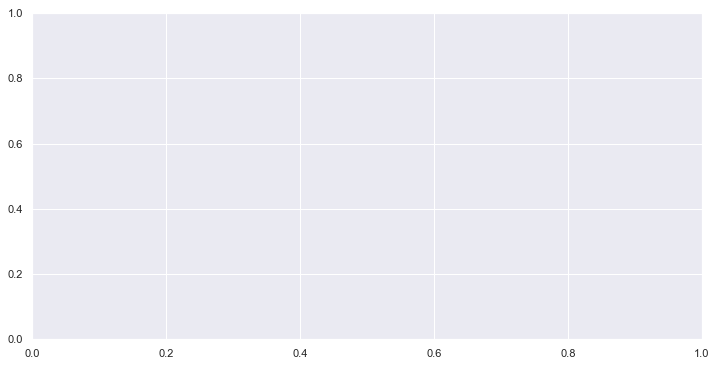

In [385]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.setrc={'figure.figsize':(11, 4)}

x_dates = df['12monthsEnding'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [380]:
for k in range(len(tt)):
    print netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

1985-03-31 08:13:46.832721
1985-04-05 21:26:15.503909
1985-04-08 21:35:06.187500
1985-04-23 09:53:29.146876
1985-05-16 11:33:14.298438
1985-07-30 16:49:35.815105
1985-08-22 18:29:05.607639
1985-09-14 20:08:44.546877
1985-09-23 09:29:54.689844
1985-10-07 21:48:02.343750
1985-10-30 23:27:24.464844
1985-11-02 23:36:09.269886
1985-11-08 12:48:30.101562
1985-11-26 01:15:21.096897
1986-01-11 04:33:36.420703
1986-01-19 17:54:59.206250
1986-02-03 06:12:35.508371
1986-03-01 08:00:17.441840
1986-03-24 09:39:13.101562
1986-04-16 11:18:06.899671
1986-05-09 12:56:55.488838
1986-06-01 14:35:32.742789
1986-06-24 16:14:01.945314
1986-07-17 17:52:39.277575
1986-09-01 21:09:37.889649
1986-09-10 10:30:46.465278
1986-09-24 22:48:05.623699
1986-11-09 14:50:45.132812
1986-11-26 16:03:29.375003
1987-02-02 20:54:26.062498
1987-02-17 09:04:44.835937
1987-02-19 22:07:09.817708
1987-05-13 15:08:17.935271
1987-08-31 12:24:23.842970
1987-09-12 12:39:42.851564
1987-09-27 00:49:58.687743
1987-09-29 13:52:24.164058
1

2010-01-25 03:21:04.736142
2010-01-26 12:19:36.471155
2010-01-26 16:05:22.795388
2010-01-29 00:00:38.471414
2010-02-04 01:19:36.772949
2010-02-05 14:03:55.150782
2010-02-13 23:18:08.460937
2010-02-13 23:57:45.119791
2010-02-14 12:22:25.431641
2010-02-15 12:02:26.318750
2010-02-23 21:16:39.860939
2010-02-25 10:00:57.724610
2010-03-02 12:19:35.990625
2010-03-05 00:00:37.941300
2010-03-06 07:29:55.249999
2010-03-07 07:59:33.872656
2010-03-15 17:13:42.119531
2010-03-18 08:12:52.943614
2010-03-20 23:57:46.138542
2010-03-21 12:22:27.563210
2010-03-25 17:14:41.837457
2010-03-27 03:56:31.917763
2010-04-04 16:31:06.819203
2010-04-06 01:55:02.931641
2010-04-06 12:19:36.255730
2010-04-09 00:00:37.589380
2010-04-14 11:09:14.937109
2010-04-15 23:53:32.900782
2010-04-24 09:07:46.655469
2010-04-24 23:57:43.229166
2010-04-25 12:22:24.654829
2010-04-25 21:52:05.275781
2010-05-04 07:06:18.450391
2010-05-05 19:50:36.955358
2010-05-11 12:19:35.096540
2010-05-14 00:00:36.424800
2010-05-14 05:04:50.167187
2

2016-10-24 00:00:08
2016-10-28 09:23:56.438419
2016-10-29 03:15:28.578125
2016-10-30 15:59:47.011718
2016-11-01 12:20:13
2016-11-08 01:14:00.560010
2016-11-09 13:58:18.950001
2016-11-18 04:00:02.091712
2016-11-19 11:56:51.725184
2016-11-19 23:59:57.999998
2016-11-20 00:00:06.500000
2016-11-20 20:20:53.021701
2016-11-27 21:11:03.309374
2016-11-28 12:20:11
2016-11-29 09:55:21.219140
2016-12-01 05:01:25.346591
2016-12-08 13:31:43.226563
2016-12-16 23:59:56.999998
2016-12-17 00:00:05.500000
2016-12-17 17:08:05.103125
2016-12-17 18:58:11.412259
2016-12-20 00:10:01.717329
2016-12-23 06:36:10.701057
2016-12-25 06:33:43.056858
2016-12-25 12:20:12
2016-12-27 15:06:37.467882
2017-01-03 04:55:27.174826
2017-01-08 01:49:29.576382
2017-01-12 23:59:58.499998
2017-01-13 00:00:07
2017-01-16 11:03:39.919642
2017-01-17 22:12:12.492058
2017-01-17 23:47:57.889062
2017-01-21 05:11:04.960938
2017-01-21 12:20:13.500000
2017-01-26 09:02:12.032812
2017-01-27 21:46:30.175000
2017-02-05 07:00:43.517113
2017-02-0

In [279]:
if days5.month ==1:
    print days5

AttributeError: 'list' object has no attribute 'month'

In [286]:
month.days5(0)

NameError: name 'month' is not defined

In [303]:
index = np.arange(len(jantime))
plt.scatter(np.asarray(jantime), np.asarray(janwh), yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Period (s)', fontsize=13, rotation=90)
plt.title('Innisfail Monthly 33 year Wave Period')
plt.savefig('Innisfail mean Monthly 33 year Wave Period')
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [266]:
timestring = ' '.join(str(e) for e in days5)

SyntaxError: EOL while scanning string literal (<ipython-input-266-eeb065872760>, line 1)

In [264]:
len(timestring)

64287

In [265]:
type(timestring)

str

In [263]:
timestring

'1985-03-31 08:13:46.832721 1985-04-05 21:26:15.503909 1985-04-08 21:35:06.187500 1985-04-23 09:53:29.146876 1985-05-16 11:33:14.298438 1985-07-30 16:49:35.815105 1985-08-22 18:29:05.607639 1985-09-14 20:08:44.546877 1985-09-23 09:29:54.689844 1985-10-07 21:48:02.343750 1985-10-30 23:27:24.464844 1985-11-02 23:36:09.269886 1985-11-08 12:48:30.101562 1985-11-26 01:15:21.096897 1986-01-11 04:33:36.420703 1986-01-19 17:54:59.206250 1986-02-03 06:12:35.508371 1986-03-01 08:00:17.441840 1986-03-24 09:39:13.101562 1986-04-16 11:18:06.899671 1986-05-09 12:56:55.488838 1986-06-01 14:35:32.742789 1986-06-24 16:14:01.945314 1986-07-17 17:52:39.277575 1986-09-01 21:09:37.889649 1986-09-10 10:30:46.465278 1986-09-24 22:48:05.623699 1986-11-09 14:50:45.132812 1986-11-26 16:03:29.375003 1987-02-02 20:54:26.062498 1987-02-17 09:04:44.835937 1987-02-19 22:07:09.817708 1987-05-13 15:08:17.935271 1987-08-31 12:24:23.842970 1987-09-12 12:39:42.851564 1987-09-27 00:49:58.687743 1987-09-29 13:52:24.164058 

In [254]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [255]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [256]:
sns.set(font_scale=1.5, style="whitegrid")

In [261]:
type(janstring)

str

In [268]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(timestring,
        wh,
        color='purple')


ValueError: x and y must have same first dimension, but have shapes (1,) and (2662,)

ValueError: Image size of 516196x588 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

In [249]:
for k in range(len(janstring)):
    print 'date:', netCDF4.num2date(janstring[k],u'days since 1985-01-01 00:00:00 UTC')

date:

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error
  


AttributeError: 'bool' object has no attribute 'all'

In [138]:
overall_ind_months = [
janwh,
febwh,
marwh,
aprwh,
maywh,
junwh,
julwh,
augwh,
sepwh,
octwh,
novwh,
decwh]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(janwh),
np.std(febwh),
np.std(marwh),
np.std(aprwh),
np.std(maywh),
np.std(junwh),
np.std(julwh),
np.std(augwh),
np.std(sepwh),
np.std(octwh),
np.std(novwh),
np.std(decwh)]

months= [
Jan,
Feb,
Mar,
Apr,
May,
Jun,
Jul,
Aug,
Sep,
Oct,
Nov,
Dec]

NameError: name 'Jan' is not defined

In [135]:
jantime

[375.19000486924784,
 383.74651859086015,
 1101.3376378684104,
 1103.8809883174254,
 1120.9314606842818,
 2928.296008496258,
 2929.6467143373798,
 2938.031573667761,
 2939.562334412697,
 2947.9472132561186,
 2949.477982204861,
 3294.994704519515,
 3296.5254125881293,
 3304.9102843738597,
 3306.441046477144,
 3314.825916293555,
 3316.3566740813226,
 3653.488528127089,
 3661.873409053095,
 3663.4041762228894,
 3671.789048685453,
 3673.319820571704,
 3681.7046957427183,
 4018.836495596426,
 4020.3672770714147,
 4028.752179970277,
 4030.019456463311,
 4040.198549914149,
 4046.5346661815834,
 4385.715288561849,
 4387.246050904038,
 4395.63093383789,
 4396.534582112631,
 4397.161695520951,
 4399.021401266622,
 4407.0773428497305,
 4749.02143664126,
 4752.594056160383,
 4754.1248282306515,
 4762.509710743331,
 4764.04048077737,
 4765.198396326164,
 5115.2528782547115,
 5119.472853566876,
 5121.003523840221,
 5129.388496219342,
 5130.9192544621055,
 5131.53454441651,
 5134.021370390184,
 5140.

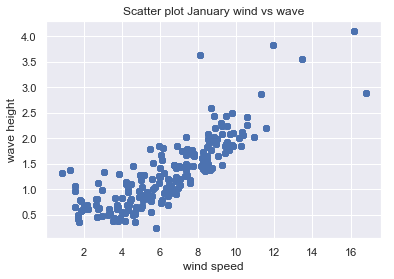

In [214]:
x = janws
y=janwh
plt.scatter(x,y)
plt.title('Scatter plot January wind vs wave')
plt.xlabel('wind speed')
plt.ylabel('wave height')
plt.show()

In [72]:
jantt = []

for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        jantt.append(netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC'))

TypeError: can't compare datetime.datetime to int

In [140]:

for k in range(len(janwh)):
    print netCDF4.num2date(jantime[k],u'days since 1985-01-01 00:00:00 UTC')

 1986-01-11 04:33:36.420703
1986-01-19 17:54:59.206250
1988-01-07 08:06:11.911831
1988-01-09 21:08:37.390626
1988-01-26 22:21:18.203122
1993-01-07 07:06:15.134077
1993-01-08 15:31:16.118750
1993-01-17 00:45:27.964895
1993-01-18 13:29:45.693257
1993-01-26 22:43:59.225329
1993-01-28 11:28:17.662500
1994-01-08 23:52:22.470486
1994-01-10 12:36:35.647614
1994-01-18 21:50:48.569901
1994-01-20 10:35:06.415625
1994-01-28 19:49:19.167763
1994-01-30 08:33:36.640626
1995-01-02 11:43:28.830180
1995-01-10 20:57:42.542187
1995-01-12 09:42:00.825658
1995-01-20 18:56:13.806423
1995-01-22 07:40:32.497395
1995-01-30 16:54:45.712171
1996-01-02 20:04:33.219531
1996-01-04 08:48:52.738970
1996-01-12 18:03:08.349432
1996-01-14 00:28:01.038430
1996-01-24 04:45:54.712582
1996-01-30 12:49:55.158089
1997-01-03 17:10:00.931744
1997-01-05 05:54:18.798109
1997-01-13 15:08:32.683594
1997-01-14 12:49:47.894531
1997-01-15 03:52:50.493010
1997-01-17 00:30:49.069436
1997-01-25 01:51:22.422217
1998-01-02 00:30:52.125805


TypeError: can't compare datetime.datetime to int

ValueError: x and y must be the same size

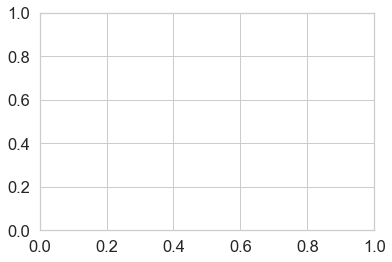

In [270]:
index = np.arange(len(timestring))
plt.scatter(index, wh[days], yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail overall_ind_months Monthly 33 year Significant Wave Height')
plt.savefig('Innisfail overall_ind_months Monthly 33 year Significant Wave Height')
plt.show()

In [272]:
print len(timestring[days])
print len(wh)

TypeError: string indices must be integers, not list

In [149]:
jantime1 = num2date(jantime[:],u'days since 1985-01-01 00:00:00 UTC')

TypeError: can't compare datetime.datetime to int

In [239]:
type(jantime)

list

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


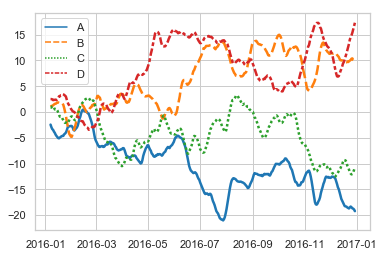

In [100]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [105]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter(iris, x="sepal_width", y="sepal_length")
fig.show()

ImportError: No module named plotly.express

In [109]:
type(jantime)

list

In [115]:
# import dateutil
# dateutil.parser.parse(jantime)
import datetime as datetime
mpl.dates.date2num(jantime)

NameError: name 'mpl' is not defined

In [107]:
date = pd.date_range(start='1/1/1985', end=None)

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

## Linear Regression

In [ ]:
months5 = [january, february, march, april, may, june, july, august, september, october, november, december]
overall


In [ ]:
months5

In [ ]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(overall, months)

In [ ]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [ ]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [ ]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

In [ ]:
T.min()

In [16]:
print len(T), len(wh)

2662 2662


In [ ]:
netCDF4.num2date(tt[0],u'days since 1985-01-01 00:00:00 UTC').month

In [ ]:
for k in range(len(days)):
    if netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC').month == 1:
        print wh[k], netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

In [ ]:
jan

In [ ]:
#print netCDF4.num2date(jan,u'days since 1985-01-01 00:00:00 UTC')

In [ ]:
len(jan)+len(feb)+len(mar)+len(apr)+len(may)+len(jun)+len(jul)+len(aug)+len(sep)+len(octo)+len(nov)+len(dec)

In [ ]:
stats.describe(marTp)

In [ ]:
for k in range(len(days)):
    print marTp[days[k]], netCDF4.num2date(martime[days[k]],u'days since 1985-01-01 00:00:00 UTC')

In [ ]:
marTp

In [ ]:
print 'Month    Min             Max             Mean'
print 'Jan', min(janTp), max(janTp), np.mean(janTp())#.mean(), stats.sem(janTp)
print 'Feb', min(febTp), max(febTp)#,# febTp.mean(), stats.sem(febTp)
print 'Mar', min(marTp), max(marTp)#,# marTp.mean(), stats.sem(marTp)
print 'Apr', min(aprTp), max(aprTp)#,# aprTp.mean(), stats.sem(aprTp)
print 'May', min(mayTp), max(mayTp)#,# mayTp.mean(), stats.sem(mayTp)
print 'Jun', min(junTp), max(junTp)#,# junTp.mean(), stats.sem(junTp)
print 'Jul', min(julTp), max(julTp)#,# julTp.mean(), stats.sem(julTp)
print 'Aug', min(augTp), max(augTp)#,# augTp.mean(), stats.sem(augTp)
print 'Sep', min(sepTp), max(sepTp)#,# sepTp.mean(), stats.sem(sepTp)
print 'Oct', min(octTp), max(octTp)#,# octTp.mean(), stats.sem(octTp)
print 'Nov', min(novTp), max(novTp)#,# novTp.mean(), stats.sem(novTp)
print 'Dec', min(decTp), max(decTp)#,# decTp.mean(), stats.sem(decTp)

In [ ]:
overall = [
np.mean(janTp),
np.mean(febTp),
np.mean(marTp),
np.mean(aprTp),
np.mean(mayTp),
np.mean(junTp),
np.mean(julTp),
np.mean(augTp),
np.mean(sepTp),
np.mean(octTp),
np.mean(novTp),
np.mean(decTp)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(janTp),
np.std(febTp),
np.std(marTp),
np.std(aprTp),
np.std(mayTp),
np.std(junTp),
np.std(julTp),
np.std(augTp),
np.std(sepTp),
np.std(octTp),
np.std(novTp),
np.std(decTp)]

In [ ]:
janTp.mean

## Plot data

In [ ]:
index = np.arange(len(label))
plt.bar(index, overall)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail 33 year Significant Wave Height')
plt.show()

In [ ]:
# Get some parameters for the Stereographic Projection
lon_0 = lon1.mean()
lat_0 = lat1.mean()


# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)


In [ ]:
lon = x
lat =y

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree(central_longitude=140))
ax.scatter(lon,lat)
ax.coastlines()
ax.stock_img()
ax.gridlines()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=to_lon,
                                                          central_latitude=to_lat))
# Here we add the transform argument and use the Geodetic projection.
ax.scatter(lon, lat, transform=ccrs.Geodetic())
ax.stock_img()
ax.coastlines()
ax.gridlines()

In [ ]:
# An arbitrary choice.
GBReast = 147
GBRwest = 148
GBRnorth = -17
GBRsouth = -18

standard_parallels = (49, 77)
central_longitude = -(91 + 52 / 60)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([GBRwest, GBReast, GBRsouth, GBRnorth])
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.OCEAN)

In [ ]:
# Get some parameters for the Stereographic Projection
lons =lon[days]
lats = lat[days]

lon_0 = lons.mean()
lat_0 = lats.mean()

In [ ]:



# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)


In [ ]:
#lat
lat1 =ncjt1.variables['LATITUDE'][:]
latj2 =ncjtwo2.variables['LATITUDE'][:]
latc2 =ncc2.variables['LATITUDE'][:]
latsa2 = ncs2.variables['LATITUDE'][:]
latse2 = ncse2.variables['LATITUDE'][:]

#long
lon1 = ncjt1.variables['LONGITUDE'][:]
lonj2 =ncjtwo2.variables['LONGITUDE'][:]
lonc2 =ncc2.variables['LONGITUDE'][:]
lons2 =ncs2.variables['LONGITUDE'][:]
lonse2= ncse2.variables['LONGITUDE'][:]

# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()


# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)
